In [73]:
%config Completer.use_jedi = False  # enable code auto-completion
import numpy as np #import numpy to work with arrays
import pandas as pd #import pandas to manipulate the dataset
from matplotlib import pyplot as plt #import the module matplotlib.pyplot to do visulization
from sklearn.preprocessing import PolynomialFeatures    # function to generate polynomial and interaction features
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score    # function to calculate mean squared error 
from sklearn.model_selection import train_test_split 

In [74]:
df = pd.read_csv('games.csv')
df.drop(columns=['victory_status','winner','increment_code','white_id','black_id',\
                 'moves','opening_eco','opening_name','opening_ply',],inplace=True)  # drop unrelevant columns
df.head(5)

,id,rated,created_at,last_move_at,turns,white_rating,black_rating
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,1500,1191
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,1322,1261
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,1496,1500
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,1439,1454
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,1523,1469


In [75]:
df = df.dropna(axis=0)
timeCalc = df['last_move_at'] - df['created_at']
ratingDifference = abs(df['white_rating'] - df['black_rating'])
data = df.assign(rating_diff = ratingDifference, time = timeCalc)
data = data[data['rated'] == True]
data = data[data['time'] > 0.0]
data = data[data['time'] < 10000000.0]
data = data.drop(['rated','white_rating','black_rating','created_at','last_move_at'],axis=1)
data = data.drop_duplicates()
#new_array = [tuple(row) for row in data.to_numpy()]
#uniques = np.unique(new_array, axis = 0)
#uniques[0]
#data = data.sample(1000)
data_np = data.to_numpy()
num_rows, num_cols = data_np.shape
X = data_np[:,3].reshape(num_rows, 1)
y = data_np[:,2]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)
data

,id,turns,rating_diff,time
9287,cr5iuIrQ,3,97,555324.0
9291,niw2zjOi,10,475,510205.0
9292,ihAlSQ2i,21,316,200445.0
9293,b21epG0r,20,280,160798.0
9294,WiuVyh8F,43,34,635639.0
...,...,...,...,...
20053,EfqH7VVH,24,471,321734.0
20054,WSJDhbPl,82,37,744219.0
20055,yrAas0Kj,35,67,172834.0
20056,b0v4tRyF,109,133,946699.0


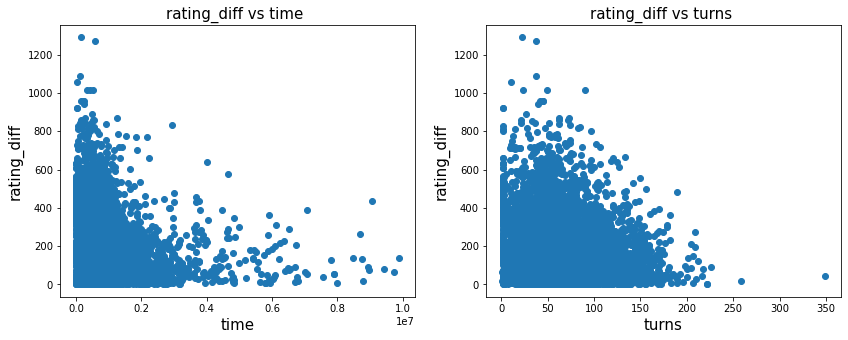

In [76]:

fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].scatter(data['time'], data['rating_diff'])
axes[0].set_xlabel("time",size=15)
axes[0].set_ylabel("rating_diff",size=15)
axes[0].set_title("rating_diff vs time ",size=15)

axes[1].scatter(data['turns'], data['rating_diff'])
axes[1].set_xlabel("turns",size=15)
axes[1].set_ylabel("rating_diff",size=15)
axes[1].set_title("rating_diff vs turns ",size=15)
#axes[1].hist(data['time'])
#axes[1].set_title('distribution of time',size=15)
#axes[1].set_ylabel("count of datapoints",size=15)
#axes[1].set_xlabel("time intervals",size=15)
plt.show()

In [77]:
regr = LinearRegression().fit(X_train, y_train)

y_pred = regr.predict(X_train)
tr_error = mean_squared_error(y_train, y_pred)
print('The training error is: ', tr_error)
print("w1 = ", regr.coef_)
print("w0 = ",regr.intercept_)

The training error is:  22248.01310055317
w1 =  [-1.82257682e-05]
w0 =  163.77186544004294


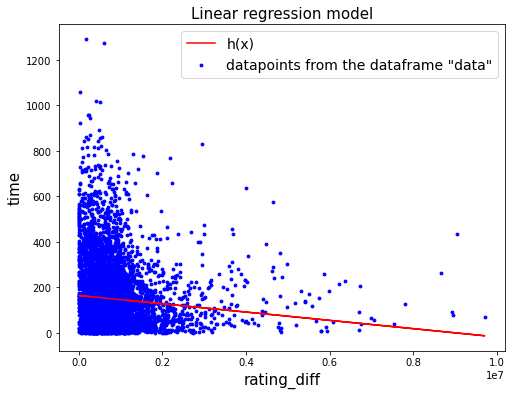

In [78]:

plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color='b', s=8, label='datapoints from the dataframe "data"') 

y_pred = regr.predict(X_train)
plt.plot(X_train, y_pred, color='r', label='h(x)')  

plt.xlabel('rating_diff',size=15)
plt.ylabel('time',size=15)

plt.title('Linear regression model',size=15)
plt.legend(loc='best',fontsize=14)

plt.show()

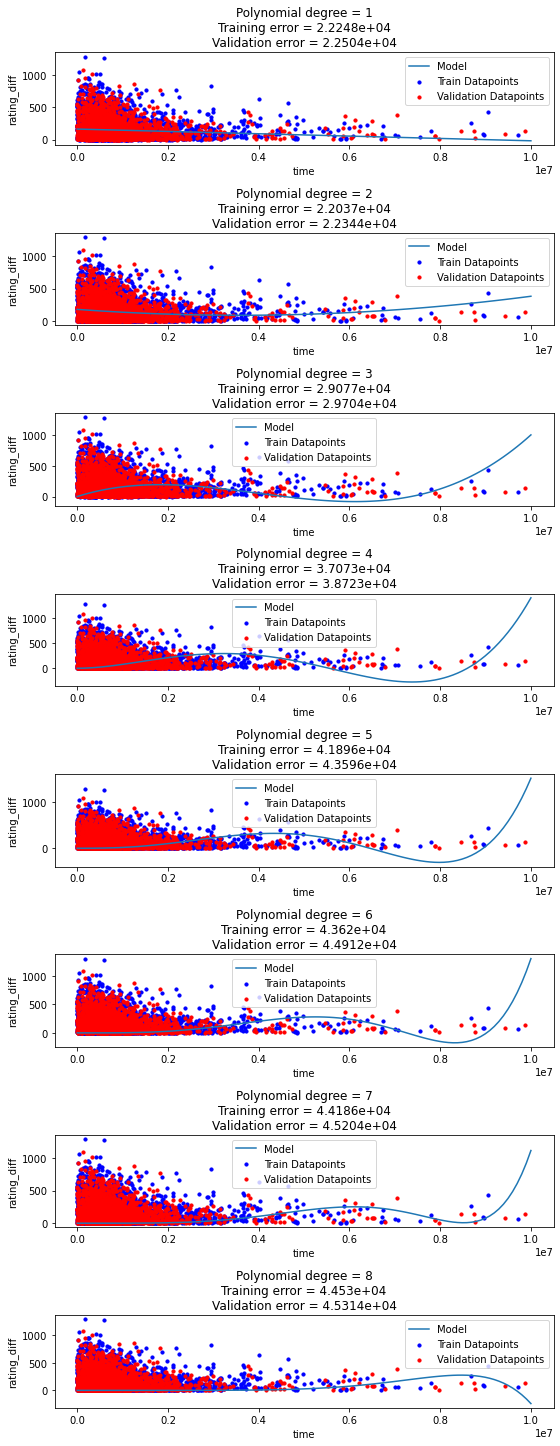

In [102]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8]    

tr_errors = []          
val_errors = []

plt.figure(figsize=(8, 20))
for i, degree in enumerate(degrees):
    plt.subplot(len(degrees), 1, i + 1)
    
    lin_regr = LinearRegression(fit_intercept=False)
 
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    lin_regr.fit(X_train_poly, y_train)
    
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)

    tr_errors.append(tr_error)
    val_errors.append(val_error)
    X_fit = np.linspace(-25, 10000000, 100)
    plt.tight_layout()
    plt.plot(X_fit, lin_regr.predict(poly.transform(X_fit.reshape(-1, 1))), label="Model")
    plt.scatter(X_train, y_train, color="b", s=10, label="Train Datapoints")
    plt.scatter(X_val, y_val, color="r", s=10, label="Validation Datapoints")
    plt.xlabel('time')
    plt.ylabel('rating_diff')
    plt.legend(loc="best")
    plt.title(f'Polynomial degree = {degree}\nTraining error = {tr_error:.5}\nValidation error = {val_error:.5}')
plt.show()

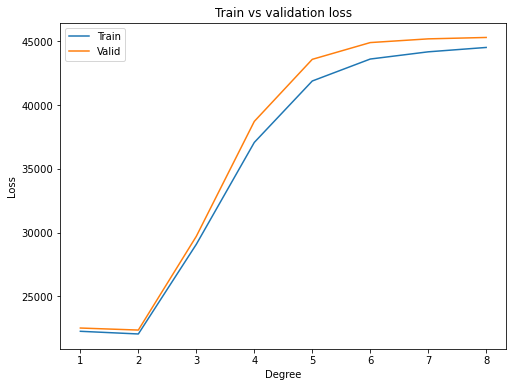

In [103]:
plt.figure(figsize=(8, 6))

plt.plot(degrees, tr_errors, label = 'Train')
plt.plot(degrees, val_errors,label = 'Valid')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Loss')
plt.title('Train vs validation loss')
plt.show()